<FONT color="#0BB296" size="14">Projet Analyse Numerique </FONT>

Le projet consiste à modeliser quelques méthode d'analyse numérique avec Python.
- Méthode des Réctangles Gauche
- Méthode des Trapézes
- Méthode de Simpson
- Méthode des Pointes Milieux

<img src="Demo-projet.gif" alt="demo de projet"/>

In [53]:
conda install -c conda-forge ipympl

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [54]:
%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

In [55]:
f=lambda x:1/(1+x**2)

In [56]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine,color=c )
        plt.plot(xl, yl,"bo")
        plt.xlabel (lx)
        plt.ylabel (ly)
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =10 )
    

In [57]:
class Trapezoidal(object):
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,color=c)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.xlabel(lx)
        plt.ylabel (ly)
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =10 )

In [58]:
class Simpson(object):
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly
   
    def integrate(self,f):#calculer la somme ((b-a)/6*n)*[f(a)+2*sum(xi)+4*sum(mi)+f(b)]
        x=self.x #les points supports xi #x(0)=a-->x(n)=b
        y=f(x) #yi variable local y(o)=f(xo)-->y(n)
        h = float(x[1] - x[0])#pas h=(b-a)/2*n
        n = len(x) - 1#nombre subdivision
        if n % 2 == 1:#si le reste de la division =1 impaire
            n -= 1
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        #y[1:-1:2] 
        #calculer la somme
        #T(-1] dernier valeur dans le tableau)
        return h * s / 3.0
   

    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):#range intervalle 0 à n
            xx=np.linspace(xl[i], xl[i+1], resolution)
            #pour chaque subdivisuion  on doit dessiner polynome dnc on doit aussi le subdiviser
            m=(xl[i]+xl[i+1])/2#pt milieu
            aa=xl[i]#borne gauche
            bb=xl[i+1]#borne droite
            l0 = (xx-m)/(aa-m)*(xx-bb)/(aa-bb)
            l1 = (xx-aa)/(m-aa)*(xx-bb)/(m-bb)
            l2 = (xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            P = f(aa)*l0 + f(m)*l1 + f(bb)*l2#fonction dde polynome
            plt.plot(xx,P,'b')#dessiner polynome d'interpolation
            plt.plot(m,f(m),"r*")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.xlabel(lx)
        plt.ylabel (ly)
        plt.title ( ' Methode de Simpson' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =10 )

In [59]:
class Milieux( object ) :
    def __init__ (self , a , b , n , f, c ,lx , ly ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
        self.c = c
        self.lx = lx
        self.ly = ly

    def integrate(self,f):
        h=float(self.b-self.a)/(self.n)
        sum1=0
        for i in range(self.n):
            sum1 += f(self.a+(i+1/2)*h)

        I = h*sum1
        return I

    def Graph ( self , f ,c,lx,ly, resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            mi=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0 , f(mi), f(mi) , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
            plt.plot(mi,f(mi), 'g*')
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine,color=c )
        #plt.plot(xl, yl,"bo")
        plt.xlabel ( lx )
        plt.ylabel ( ly )
        plt.title ( ' Methode de Milieux' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =10 )

In [60]:
def sim(a,b,n,f,i,x,y):
    R=RectangleG(a,b,n,f,i,x,y)
    T=Trapezoidal(a,b,n,f,i,x,y)
    M=Milieux(a,b,n,f,i,x,y)
    S=Simpson(a,b,n,f,i,x,y)

    plt.subplot(221)  
    R.Graph(f,i,x,y)
    plt.subplot(222)
    T.Graph(f,i,x,y)
    plt.subplot(223)
    M.Graph(f,i,x,y)
    plt.subplot(224)
    S.Graph(f,i,x,y)
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
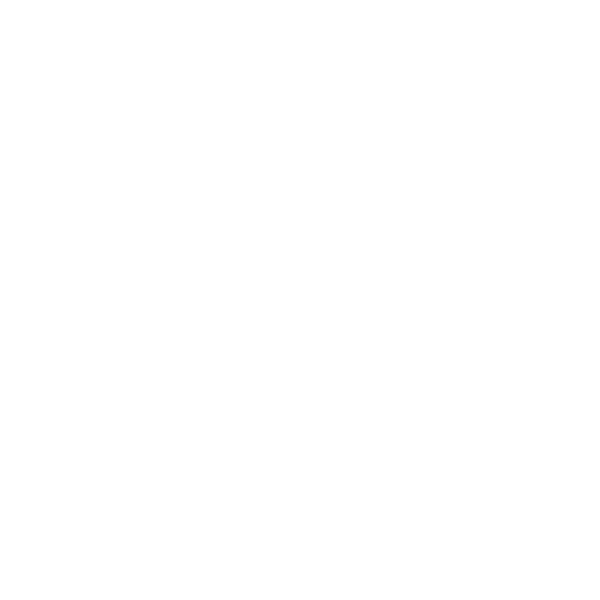

In [61]:
output = widgets.Output() 
with output:
    fig= plt.figure(figsize=(6,6))

fig.canvas.toolbar_position = 'bottom' 

In [62]:
# create some control elements
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='N')
color_picker = widgets.ColorPicker(value="green", description='pick a color')
text_a= widgets.IntText(value=-1, description='Donner A', continuous_update=False)
text_b = widgets.IntText(value=1, description='Donner B', continuous_update=False)
select = widgets.Dropdown(options={'1/(1+x**2)':lambda x:1/(1+x**2),
                                    'sin(x)':lambda x: sin(x),
                                    'cos(x)':lambda x:cos(x),
                                    'tan(x)':lambda x:tan(x),
                                    '1/(1+x)':lambda x:1/(1+x),
                                    'x**2-x+5':lambda x:x**2-x+5},description='Choisir une fonction') 
text_xlabel = widgets.Text(value='x', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='f(x)', description='ylabel', continuous_update=False)
button = widgets.Button(description="Afficher")

# callback functions
def update(change):
    """redraw line (update plot)"""
    fig.clear() 
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,text_ylabel.value)
   
def line_color(change):
    """set line color"""
    fig.clear()
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,text_ylabel.value)
    
def update_xlabel(change):
    fig.clear()
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,change.new,text_ylabel.value)
def update_ylabel(change):
    fig.clear()
    sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,change.new)
def on_button_clicked(b):
    with output:
        fig.clear()
        sim(text_a.value,text_b.value,int_slider.value,select.value,color_picker.value,text_xlabel.value,text_ylabel.value)

int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')
text_xlabel.observe(update_xlabel, 'value')
text_ylabel.observe(update_ylabel, 'value')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
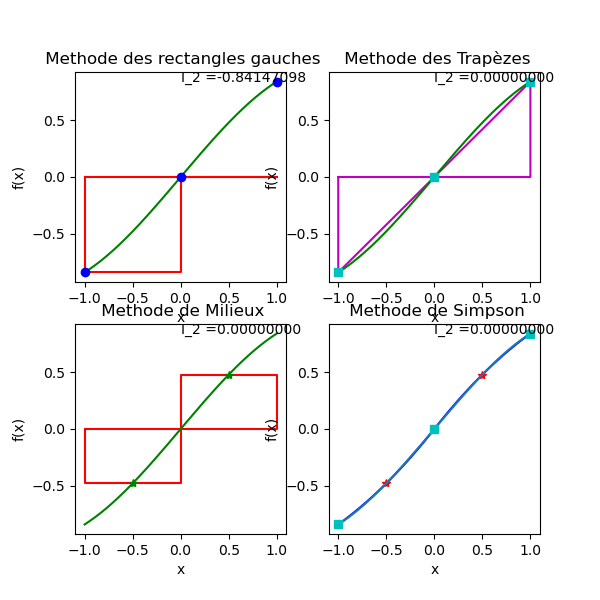

In [63]:
controls = widgets.VBox([int_slider, color_picker,text_a, text_b,select,text_xlabel, text_ylabel,button])
button.on_click(on_button_clicked)
widgets.HBox([controls, output])